## 学習に関するテクニック
* パラメータの更新(損失関数の値をできるだけ小さくする)

### SGD
* lrが学習係数
* Updateで繰り返し呼ばれる
* 引数のparamsとgradsはディクショナリ変数

### SGDの欠点
* 次のような関数が与えられて最小値を求める場合
$$f(x, y)=\frac{1}{20}x^2+y^2$$

* 関数の形状が等方的でないとスマートな学習にはならない

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in parans.keys():
            params[key] -= self.lr * grads[key]

### Momentum

$$v\leftarrow\alpha{v}-\eta{\frac{\delta{L}}{\delta{W}}}　$$
$$W\leftarrow W+v$$

* Wは重みパラメータ右側はWに関する損失関数の勾配ηは学習係数
* vとは物理では速度は表す。αvは物体が何も力を受けない時に徐々に減速していくための役割がある。

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.item():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += v[key]

### AdaGrad

$$h \leftarrow h+\frac{\delta{L}}{\delta{W}} \cdot \frac{\delta{L}}{\delta{W}}$$
$$W \leftarrow W - \eta{\frac{1}{\sqrt{h}}}\frac{\delta{L}}{\delta{W}}$$

* hとはこれまで経験した勾配の値を二乗和として保持する。
* これをさらに改善した手法としてRMSPropがある。（過去の勾配を均一に加算するのではなく忘れていくという手法（新しい勾配が大きく反映する））

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key]  / (np.sqrt(self.h[key] + 1e-7))#1e-7はゼロで乗算するのを防ぐため

### Adam
* MomentumとAdaGradの融合
##### Required:
* α（学習係数）
* β１・β２（指数関数的減衰）
* m0(一つ目のモーメントベクター)
* v0(指数関数的に重み付けされた無限大ノルム)

$$m_t \leftarrow \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$$
$$v_t \leftarrow \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^{2}$$

$$\alpha_t = \alpha \cdot \sqrt{1 - \beta_2^{t}} / (1 - \beta_1{t})$$

In [4]:
class Adam:
    
    '''https://arxiv.org/abs/1412.6980'''
    
    def __inti__(lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.m = None
        self.v = None
        self.iter = 0
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeors_like(val)
        
        for key in params.keys():
            lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
            self.m[key] += self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] += self.beta2 * self.v[key] + (1 - self.beta2) * (grads[key]**2)
            
            params[key] -= self.lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

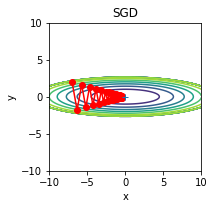

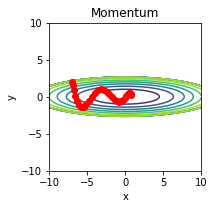

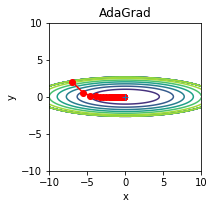

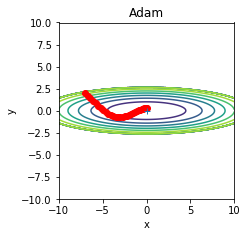

In [5]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
os.chdir("/work/basic_deeplearning/deep-learning-from-scratch-master/common")
from optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.figure(figsize=(6, 6))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
plt.tight_layout()    
plt.show()

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def ReLU(x):
    return np.maximum(0, x)
def tanh(x):
    return np.tanh(x)
x = np.random.randn(10000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

In [7]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
    w = np.random.randn(node_num, node_num)   * 1
    z = np.dot(x, w)
    a = tanh(z)
    activations[i] = a

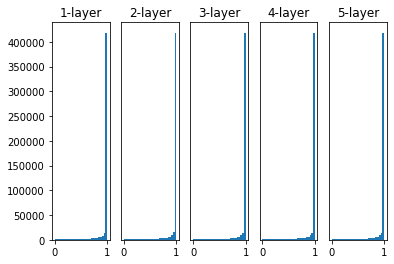

In [8]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 重みの初期値を０にする
* 上記のアクティベーションは０と１に偏った分布になっている。
* 逆伝播での勾配の値が徐々に小さくなりやがて勾配が消えてしまう。（勾配消失）

### 初期値の設定
* 活性化関数が線形（左右対称の場合）は**Xaiver**の初期値が有効
* 活性化関数が非線形の場合は**He**の初期値が有効

In [9]:
def plot_activations(function, weight):
    x = np.random.randn(10000, 100)
    node_num = 100
    hidden_layer_size = 5
    activations = {}
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i - 1]
        w = weight
        z = np.dot(x, w)
        a = function(z)
        activations[i] = a
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        plt.xlim(0.1, 1)
        plt.ylim(0, 100000)
        plt.hist(a.flatten(), 30, range=(0,1))
    plt.show()

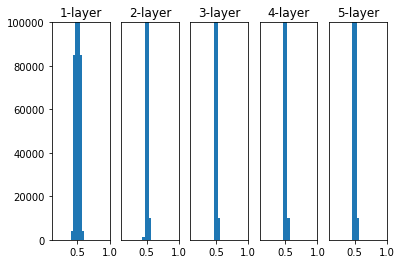

In [10]:
weight = [(np.random.randn(node_num, node_num) * 1), (np.random.randn(node_num, node_num) * 0.01),
          (np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)), 
          np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)]
function = [sigmoid, tanh, ReLU]

plot_activations(function=function[0], weight=weight[1])#sigmoid関数と標準偏差0.0１を重みの初期値とした場合の分布

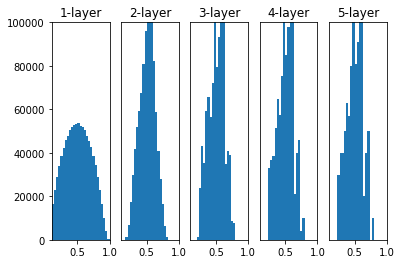

In [11]:
plot_activations(function=function[0], weight=weight[2])#sigmoid関数とXavierの初期値を使用した場合の分布

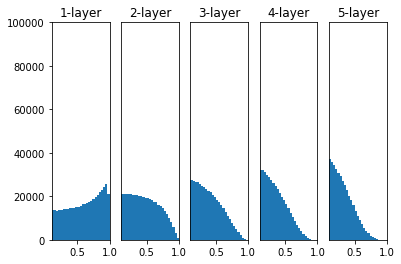

In [12]:
plot_activations(function=function[1], weight=weight[2])#tanh関数とXaiverの初期値を用いたときのアクティベーションの分布

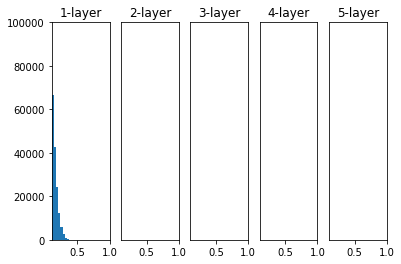

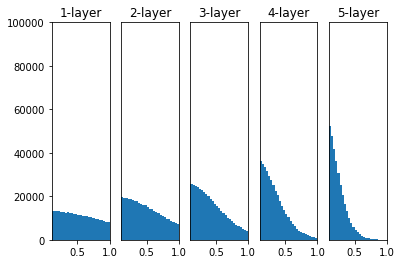

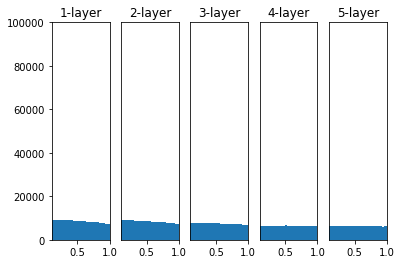

In [13]:
plot_activations(function=function[2], weight=weight[1])
plot_activations(function=function[2], weight=weight[2])#ReLU関数とXavierの初期値を使用した場合
plot_activations(function=function[2], weight=weight[3])#ReLU関数とHeの初期値を使用した場合

===========iteration:0===========
std=0.01:2.302546156801715
Xavier:2.294314706901295
He:2.4332184248623445
===========iteration:500===========
std=0.01:2.3002050226595596
Xavier:1.0166416573995314
He:0.427541144138306
===========iteration:1000===========
std=0.01:2.2949259067917644
Xavier:0.45412413719082845
He:0.371386345654512
===========iteration:1500===========
std=0.01:2.3071466725763132
Xavier:0.3733598415431839
He:0.22407903532656953


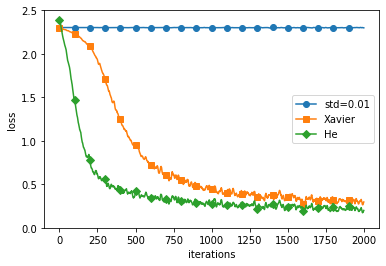

In [14]:
os.chdir("/work/basic_deeplearning/deep-learning-from-scratch-master")
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 500 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### Batch Normalization
#### なぜBatch Normalizationが有効か
* 学習を速く進行させることができる
* 初期値にそれほど依存しない
* 過学習を抑制する

============== 1/16 ==============
epoch:0 | 0.093 - 0.095


/work/basic_deeplearning/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/work/basic_deeplearning/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/basic_deeplearning/deep-learning-from-scratch-master/common/functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
/work/basic_deeplearning/deep-learning-from-scratch-master/common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.123
epoch:2 | 0.097 - 0.12
epoch:3 | 0.097 - 0.13
epoch:4 | 0.097 - 0.158
epoch:5 | 0.097 - 0.18
epoch:6 | 0.097 - 0.2
epoch:7 | 0.097 - 0.225
epoch:8 | 0.097 - 0.241
epoch:9 | 0.097 - 0.269
epoch:10 | 0.097 - 0.292
epoch:11 | 0.097 - 0.312
epoch:12 | 0.097 - 0.335
epoch:13 | 0.097 - 0.336
epoch:14 | 0.097 - 0.364
epoch:15 | 0.097 - 0.374
epoch:16 | 0.097 - 0.396
epoch:17 | 0.097 - 0.41
epoch:18 | 0.097 - 0.421


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.437
============== 2/16 ==============
epoch:0 | 0.105 - 0.078


/work/basic_deeplearning/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/work/basic_deeplearning/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.099 - 0.089
epoch:2 | 0.099 - 0.134
epoch:3 | 0.099 - 0.166
epoch:4 | 0.116 - 0.193
epoch:5 | 0.116 - 0.21
epoch:6 | 0.116 - 0.231
epoch:7 | 0.116 - 0.251
epoch:8 | 0.116 - 0.275
epoch:9 | 0.116 - 0.299
epoch:10 | 0.116 - 0.319
epoch:11 | 0.116 - 0.346
epoch:12 | 0.116 - 0.366
epoch:13 | 0.116 - 0.385
epoch:14 | 0.116 - 0.416
epoch:15 | 0.116 - 0.43
epoch:16 | 0.116 - 0.44
epoch:17 | 0.116 - 0.454
epoch:18 | 0.116 - 0.471


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.486
============== 3/16 ==============
epoch:0 | 0.089 - 0.077
epoch:1 | 0.263 - 0.094
epoch:2 | 0.434 - 0.145
epoch:3 | 0.523 - 0.181
epoch:4 | 0.585 - 0.212
epoch:5 | 0.63 - 0.257
epoch:6 | 0.697 - 0.291
epoch:7 | 0.729 - 0.332
epoch:8 | 0.78 - 0.362
epoch:9 | 0.81 - 0.395
epoch:10 | 0.825 - 0.421
epoch:11 | 0.844 - 0.464
epoch:12 | 0.87 - 0.493
epoch:13 | 0.872 - 0.513
epoch:14 | 0.895 - 0.54
epoch:15 | 0.901 - 0.556
epoch:16 | 0.919 - 0.58
epoch:17 | 0.924 - 0.607
epoch:18 | 0.927 - 0.625


No handles with labels found to put in legend.


epoch:19 | 0.937 - 0.655
============== 4/16 ==============
epoch:0 | 0.116 - 0.072
epoch:1 | 0.261 - 0.103
epoch:2 | 0.393 - 0.177
epoch:3 | 0.478 - 0.25
epoch:4 | 0.541 - 0.326
epoch:5 | 0.596 - 0.397
epoch:6 | 0.633 - 0.442
epoch:7 | 0.676 - 0.498
epoch:8 | 0.68 - 0.527
epoch:9 | 0.713 - 0.563
epoch:10 | 0.742 - 0.605
epoch:11 | 0.748 - 0.629
epoch:12 | 0.765 - 0.662
epoch:13 | 0.775 - 0.677
epoch:14 | 0.796 - 0.706
epoch:15 | 0.812 - 0.718
epoch:16 | 0.822 - 0.743
epoch:17 | 0.84 - 0.75
epoch:18 | 0.846 - 0.765


No handles with labels found to put in legend.


epoch:19 | 0.849 - 0.783
============== 5/16 ==============
epoch:0 | 0.099 - 0.076
epoch:1 | 0.099 - 0.169
epoch:2 | 0.1 - 0.308
epoch:3 | 0.1 - 0.433
epoch:4 | 0.102 - 0.509
epoch:5 | 0.105 - 0.568
epoch:6 | 0.105 - 0.62
epoch:7 | 0.112 - 0.669
epoch:8 | 0.122 - 0.704
epoch:9 | 0.129 - 0.722
epoch:10 | 0.143 - 0.744
epoch:11 | 0.168 - 0.774
epoch:12 | 0.188 - 0.792
epoch:13 | 0.217 - 0.797
epoch:14 | 0.228 - 0.816
epoch:15 | 0.264 - 0.826
epoch:16 | 0.275 - 0.843
epoch:17 | 0.303 - 0.847
epoch:18 | 0.317 - 0.865


No handles with labels found to put in legend.


epoch:19 | 0.331 - 0.868
============== 6/16 ==============
epoch:0 | 0.137 - 0.068
epoch:1 | 0.146 - 0.161
epoch:2 | 0.116 - 0.467
epoch:3 | 0.116 - 0.616
epoch:4 | 0.116 - 0.69
epoch:5 | 0.116 - 0.744
epoch:6 | 0.128 - 0.779
epoch:7 | 0.128 - 0.814
epoch:8 | 0.116 - 0.837
epoch:9 | 0.116 - 0.859
epoch:10 | 0.116 - 0.88
epoch:11 | 0.116 - 0.885
epoch:12 | 0.116 - 0.903
epoch:13 | 0.116 - 0.906
epoch:14 | 0.116 - 0.912
epoch:15 | 0.116 - 0.92
epoch:16 | 0.118 - 0.931
epoch:17 | 0.119 - 0.94
epoch:18 | 0.171 - 0.946


No handles with labels found to put in legend.


epoch:19 | 0.137 - 0.95
============== 7/16 ==============
epoch:0 | 0.06 - 0.111
epoch:1 | 0.117 - 0.244
epoch:2 | 0.117 - 0.529
epoch:3 | 0.117 - 0.658
epoch:4 | 0.117 - 0.739
epoch:5 | 0.117 - 0.782
epoch:6 | 0.117 - 0.81
epoch:7 | 0.117 - 0.842
epoch:8 | 0.117 - 0.876
epoch:9 | 0.117 - 0.894
epoch:10 | 0.117 - 0.912
epoch:11 | 0.117 - 0.924
epoch:12 | 0.117 - 0.939
epoch:13 | 0.117 - 0.949
epoch:14 | 0.117 - 0.957
epoch:15 | 0.117 - 0.967
epoch:16 | 0.117 - 0.971
epoch:17 | 0.117 - 0.979
epoch:18 | 0.117 - 0.984
epoch:19 | 0.117 - 0.986


No handles with labels found to put in legend.


============== 8/16 ==============
epoch:0 | 0.092 - 0.169
epoch:1 | 0.117 - 0.478
epoch:2 | 0.117 - 0.676
epoch:3 | 0.117 - 0.729
epoch:4 | 0.116 - 0.78
epoch:5 | 0.116 - 0.85
epoch:6 | 0.116 - 0.881
epoch:7 | 0.116 - 0.916
epoch:8 | 0.116 - 0.946
epoch:9 | 0.116 - 0.968
epoch:10 | 0.116 - 0.98
epoch:11 | 0.116 - 0.989
epoch:12 | 0.116 - 0.993
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.117 - 0.075
epoch:1 | 0.116 - 0.402
epoch:2 | 0.116 - 0.689
epoch:3 | 0.116 - 0.791
epoch:4 | 0.116 - 0.833
epoch:5 | 0.116 - 0.866
epoch:6 | 0.116 - 0.884
epoch:7 | 0.117 - 0.927
epoch:8 | 0.117 - 0.954
epoch:9 | 0.117 - 0.964
epoch:10 | 0.117 - 0.989
epoch:11 | 0.117 - 0.988
epoch:12 | 0.117 - 0.994
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 1.0


No handles with labels found to put in legend.


============== 10/16 ==============
epoch:0 | 0.117 - 0.11
epoch:1 | 0.116 - 0.35
epoch:2 | 0.117 - 0.765
epoch:3 | 0.117 - 0.877
epoch:4 | 0.117 - 0.918
epoch:5 | 0.116 - 0.931
epoch:6 | 0.116 - 0.935
epoch:7 | 0.116 - 0.972
epoch:8 | 0.116 - 0.944
epoch:9 | 0.116 - 0.986
epoch:10 | 0.116 - 0.992
epoch:11 | 0.116 - 0.995
epoch:12 | 0.116 - 0.994
epoch:13 | 0.116 - 0.995
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.996


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.998
============== 11/16 ==============
epoch:0 | 0.099 - 0.129
epoch:1 | 0.116 - 0.693
epoch:2 | 0.117 - 0.721
epoch:3 | 0.116 - 0.746
epoch:4 | 0.117 - 0.75
epoch:5 | 0.117 - 0.785
epoch:6 | 0.117 - 0.777
epoch:7 | 0.117 - 0.801
epoch:8 | 0.117 - 0.879
epoch:9 | 0.117 - 0.942
epoch:10 | 0.117 - 0.921
epoch:11 | 0.117 - 0.979
epoch:12 | 0.117 - 0.975
epoch:13 | 0.117 - 0.878
epoch:14 | 0.117 - 0.977
epoch:15 | 0.117 - 0.989
epoch:16 | 0.117 - 0.983
epoch:17 | 0.117 - 0.991


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.991
epoch:19 | 0.117 - 0.995
============== 12/16 ==============
epoch:0 | 0.093 - 0.156
epoch:1 | 0.117 - 0.583
epoch:2 | 0.117 - 0.607
epoch:3 | 0.117 - 0.692
epoch:4 | 0.117 - 0.725
epoch:5 | 0.117 - 0.696
epoch:6 | 0.117 - 0.675
epoch:7 | 0.117 - 0.761
epoch:8 | 0.117 - 0.755
epoch:9 | 0.117 - 0.777
epoch:10 | 0.117 - 0.644
epoch:11 | 0.117 - 0.801
epoch:12 | 0.117 - 0.796
epoch:13 | 0.117 - 0.8
epoch:14 | 0.117 - 0.801
epoch:15 | 0.117 - 0.8
epoch:16 | 0.117 - 0.801
epoch:17 | 0.117 - 0.799
epoch:18 | 0.117 - 0.802


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.801
============== 13/16 ==============
epoch:0 | 0.117 - 0.104
epoch:1 | 0.117 - 0.547
epoch:2 | 0.116 - 0.483
epoch:3 | 0.116 - 0.57
epoch:4 | 0.116 - 0.57
epoch:5 | 0.116 - 0.577
epoch:6 | 0.116 - 0.59
epoch:7 | 0.117 - 0.604
epoch:8 | 0.116 - 0.607
epoch:9 | 0.116 - 0.591
epoch:10 | 0.116 - 0.618
epoch:11 | 0.116 - 0.627
epoch:12 | 0.116 - 0.617
epoch:13 | 0.116 - 0.531
epoch:14 | 0.116 - 0.615
epoch:15 | 0.116 - 0.62
epoch:16 | 0.116 - 0.615
epoch:17 | 0.117 - 0.616
epoch:18 | 0.116 - 0.617


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.617
============== 14/16 ==============
epoch:0 | 0.097 - 0.131
epoch:1 | 0.099 - 0.4
epoch:2 | 0.097 - 0.454
epoch:3 | 0.097 - 0.495
epoch:4 | 0.117 - 0.522
epoch:5 | 0.117 - 0.524
epoch:6 | 0.117 - 0.521
epoch:7 | 0.117 - 0.524
epoch:8 | 0.116 - 0.526
epoch:9 | 0.117 - 0.531
epoch:10 | 0.117 - 0.597
epoch:11 | 0.117 - 0.592
epoch:12 | 0.117 - 0.622
epoch:13 | 0.116 - 0.592
epoch:14 | 0.116 - 0.622
epoch:15 | 0.116 - 0.595
epoch:16 | 0.116 - 0.681
epoch:17 | 0.117 - 0.663
epoch:18 | 0.117 - 0.684


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.7
============== 15/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.093 - 0.241
epoch:2 | 0.116 - 0.259
epoch:3 | 0.116 - 0.296
epoch:4 | 0.116 - 0.361
epoch:5 | 0.116 - 0.401
epoch:6 | 0.116 - 0.392
epoch:7 | 0.116 - 0.405
epoch:8 | 0.117 - 0.46
epoch:9 | 0.116 - 0.516
epoch:10 | 0.116 - 0.516
epoch:11 | 0.116 - 0.519
epoch:12 | 0.116 - 0.523
epoch:13 | 0.116 - 0.518
epoch:14 | 0.116 - 0.523
epoch:15 | 0.116 - 0.523
epoch:16 | 0.116 - 0.523
epoch:17 | 0.116 - 0.523
epoch:18 | 0.116 - 0.523


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.523
============== 16/16 ==============
epoch:0 | 0.116 - 0.245
epoch:1 | 0.116 - 0.302
epoch:2 | 0.116 - 0.304
epoch:3 | 0.117 - 0.348
epoch:4 | 0.117 - 0.377
epoch:5 | 0.117 - 0.369
epoch:6 | 0.117 - 0.329
epoch:7 | 0.117 - 0.34
epoch:8 | 0.117 - 0.395
epoch:9 | 0.117 - 0.339
epoch:10 | 0.117 - 0.316
epoch:11 | 0.117 - 0.324
epoch:12 | 0.117 - 0.329
epoch:13 | 0.117 - 0.316
epoch:14 | 0.117 - 0.307
epoch:15 | 0.117 - 0.312
epoch:16 | 0.117 - 0.41
epoch:17 | 0.117 - 0.41
epoch:18 | 0.117 - 0.408
epoch:19 | 0.117 - 0.455


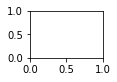

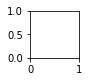

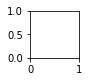

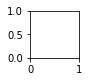

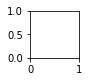

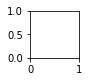

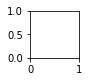

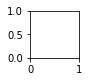

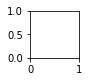

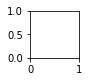

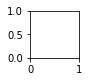

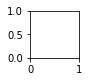

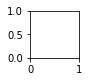

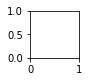

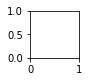

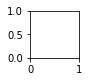

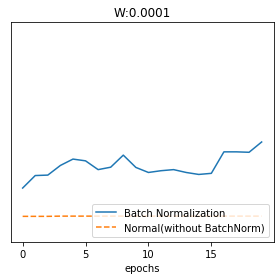

In [15]:
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.figure(figsize=(4, 4))
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
plt.tight_layout()    
plt.show()

### 過学習
* パラメータを大量に持ち、表現力の高いモデルのこと
* 訓練データが少ないこと

### 過学習抑制のために使われる手法
##### Weight decay(荷重減衰)
* 大きな重みに対してペナルティを課すこと(例えばL２正則化)
* L2正則化

$$\frac{1}{2}\lambda{W^2}$$

* 上記を損失関数に盛り込むことでペナルティを課すことができる

##### Dropout
* Weightdecayでも過学習を抑制することはできるが複雑になると厳しくなってくる
* 隠れ層のニューロンをランダムに選び、それを削除する

In [16]:
class Dropout:
    def __init__(self, dropout_ratio=.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask

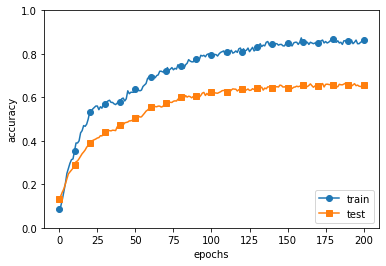

In [17]:
#Weight Decay
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

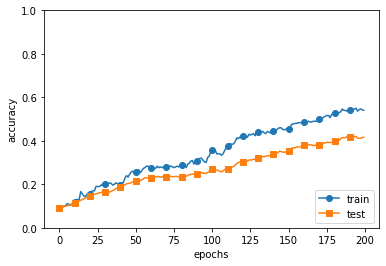

In [18]:
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=200, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ハイパーパラメータの検証
* 例えば各層のニューロンの数やバッチサイズ、学習係数、weight decayなど

### どのようにやるか

##### Step1:ハイパーパラメータの範囲の設定
##### Step2:設定された範囲から、ランダムにサンプリングする
##### Step3: サンプリングされたハイパーパラメータを使用して、検証データで認識精度を評価
##### Step4:上記の結果から範囲を狭める


* **ベイズ最適化などがあげられる**

In [19]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

In [20]:
print(weight_decay)
print(lr)

4.021000279233949e-06
8.877907171128783e-06


=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.86) | lr:0.009695189934551419, weight decay:1.6949257483979023e-08
Best-2(val acc:0.83) | lr:0.006989776886536146, weight decay:1.0035041762536191e-05
Best-3(val acc:0.81) | lr:0.008818577604799415, weight decay:3.2009067798592434e-08
Best-4(val acc:0.79) | lr:0.00689610109146116, weight decay:3.96922295241026e-06
Best-5(val acc:0.73) | lr:0.0058570580920180165, weight decay:4.761705790789384e-05
Best-6(val acc:0.72) | lr:0.00418114309304898, weight decay:8.872896430888578e-06
Best-7(val acc:0.72) | lr:0.005862829746833364, weight decay:1.010451312962172e-07
Best-8(val acc:0.71) | lr:0.006044097116467351, weight decay:7.124140915686742e-06
Best-9(val acc:0.5) | lr:0.003933848356615893, weight decay:2.3391954985830473e-08
Best-10(val acc:0.5) | lr:0.004514569985171686, weight decay:2.7191745841752793e-08
Best-11(val acc:0.45) | lr:0.001991855848368272, weight decay:5.47833294671807e-06
Best-12(val acc:0.45) | l

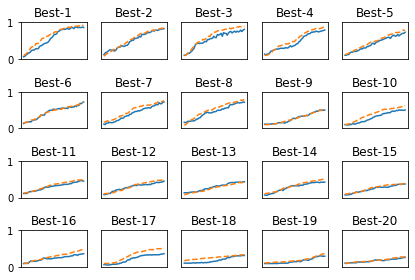

In [23]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
#     print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break
plt.tight_layout()
plt.show()